# Explainable AI

Si mette il focus su problemi di classificazione
o, per essere più precisi, sui classificatori
stessi.

Non è infatti di nostro interesse se la
classificazione sia corretta o meno, ci
interessa sapere:

- "Perché" i dati sono stati classificati in
  quel modo.
- Come modificare i dati in modo che varino il
  meno possibile ma vengano classificati in
  modo differente.

## Approccio generale

Una volta classificati i nuovi dati, viene
svolta un'analisi locale su ciascuno di
questi:

1. Si sceglie un punto da analizzare e si
   generano dati _sintetici_ vicini a quel
   punto. Per essere considerati di buona
   qualità devono essere _simili_ al dato
   iniziale ma non uguali.
2. Tramite una tecnica di _explain_ si cerca
   capire perché il punto sia stato classificato
   in quel modo andando a classificare anche
   i punti sintetici e andando a considerare
   solo quelli che vengono classificati come
   quello di partenza. In questo modo si capisce
   quali feature contribuiscono maggiormente
   alla classificazione.
3. Per ogni classe diversa da quella di partenza
   si generano punti sintetici volti a capire
   come modificare le feature in modo da
   classificare il punto nella classe presa in
   esame.

L'obbiettivo è sia capire perché il
classificatore ha dato determinati risultati,
sia capire quali sono i valori che le feature
di quello specifico individuo, dovrebbero
avere perché venga classificato in una classe
differente da quella di arrivo.

## Algoritmo genetico

Nel caso specifico degli algoritmi genetici
andiamo a trattare il problema trattando i
punti sintetici come la popolazione iniziale
dell'algoritmo genetico stesso.

### Stessa classe

Nel caso in cui si voglia capire come mai un
certo individuo sia stato classificiato in un
certo modo, si fa evolvere la popolazione
andando ad attribuire

- Fitness più alta agli individui vicini a
  quello di partenza e che sono classificati
  allo stesso modo.
- Fitness più bassa ma comunque positiva ai
  fini dell'evoluzione per quegli individui
  più lontani ma comunque classificati allo
  stesso modo. In questo modo è possibile
  esplorare meglio lo spazio entro cui le
  feature possono variare senza che l'individuo
  venga classificato diversamente.
- Fitness bassa agli individui troppo diversi
  da quello di partenza
- Fitness molto bassa o invalida a quelli che
  vengono classificati in modo diverso da quello
  di partenza.

In fase di valutazione di un individuo lo si
deve per prima cosa classificare e poi si va
a calcolare la distanza dall'individuo di
partenza.

Se l'individuo di partenza si trova molto vicino
al confine tra una classe e l'altra potrebbe
succedere che si generi un individuo sintetico
molto vicino ma classificato in modo diverso.
Ecco che diventa necessario studiare bene la
funzione di fitness di modo che si abbia una
grossa penalità o che si invalidi direttamente
la fitness in questo caso.

### Cambio di classe

Nel caso in cui invece si voglia capire come
modificare le feature per cambiare la classe
dell'individuo, si determina la classe obbiettivo
e si cerca di generare una popolazione la quale
si evolve di modo da avvicinarsi il più
velocemente possibile a tale classe.

La funzione di fitness è dunque molto simile
alla precedente ma usata in modo quasi inverso.

- Gli individui con fitness più alta sono quelli
  che rimangono vicino a quello di partenza ma
  che riescono a cambiare classe.
- Quelli con fitness più bassa sono quelli che
  non riescono a cambiare classe e/o che sono
  troppo diversi dall'individuo di partenza.

Nel caso in cui si abbiamo più classi si ripete
il procedimento per ognuna di esse.


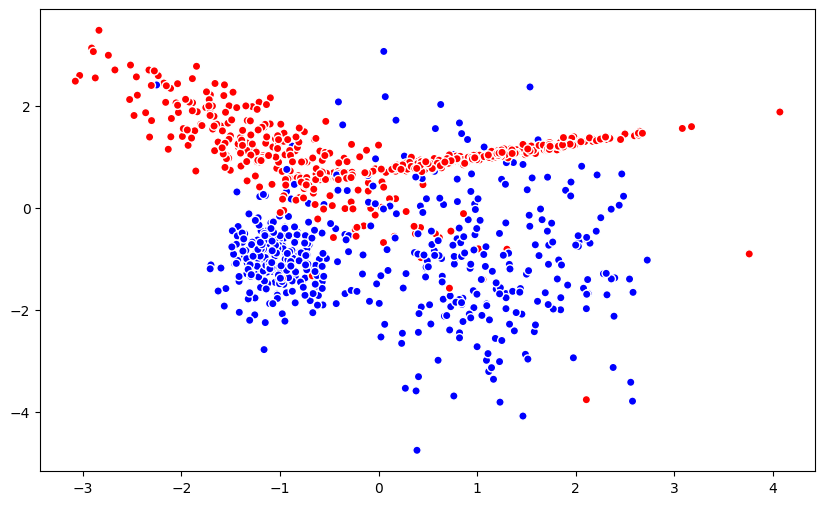

In [65]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    shuffle=False,
)


plt.figure(figsize=(10, 6))
plt.scatter(X.T[0], X.T[1], c=y.T, cmap=plt.get_cmap("bwr"), ec="w")
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=250, train_size=750)

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
res = classifier.predict(X_test) == y_test
print(f"KNN precision: {res.sum() / len(y_test) * 100.0:.2f}%")


classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
res = classifier.predict(X_test) == y_test
print(f"Random Forest precision: {res.sum() / len(y_test) * 100.0:.2f}%")

KNN precision: 93.20%
Random Forest precision: 92.40%
